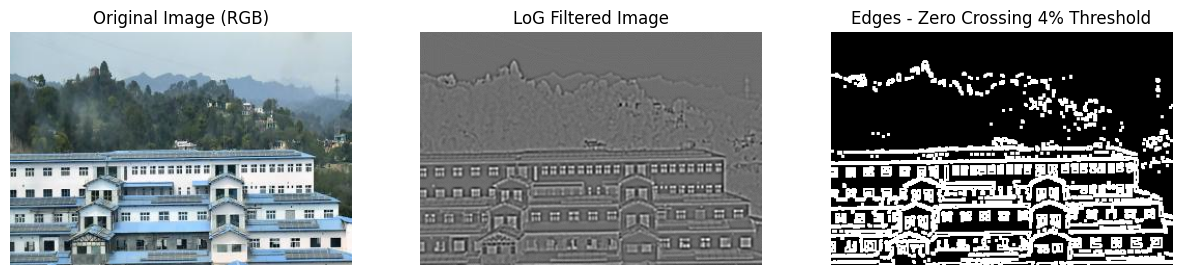

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#Load and apply Gaussian blur
image = cv2.imread(r"/content/north(1).jpg", cv2.IMREAD_COLOR)
image_blurred = cv2.GaussianBlur(image, (5, 5), 0) # 5 x 5 as given in book

# Convert the blurred image to grayscale
image_gray = cv2.cvtColor(image_blurred, cv2.COLOR_BGR2GRAY)

#Apply LoG filter
LoG = cv2.Laplacian(image_gray, cv2.CV_16S)

#Zero cross
threshold_value = 255 * 0.04 # 255 is the max value
minLoG = cv2.morphologyEx(LoG, cv2.MORPH_ERODE, np.ones((3,3)))
maxLoG = cv2.morphologyEx(LoG, cv2.MORPH_DILATE, np.ones((3,3)))
zeroCross = np.logical_or(np.logical_and(minLoG < threshold_value,  LoG > threshold_value), np.logical_and(maxLoG > threshold_value, LoG < threshold_value))

#Plotting
plt.figure(figsize=(15, 6))

plt.subplot(131)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image (RGB)')
plt.axis('off')

#LoG filtered image
plt.subplot(132)
plt.imshow(LoG, cmap='gray')
plt.title('LoG Filtered Image')
plt.axis('off')

#edge image from zero-crossing
plt.subplot(133)
plt.imshow(zeroCross, cmap='gray')
plt.title('Edges - Zero Crossing 4% Threshold')
plt.axis('off')

plt.show()


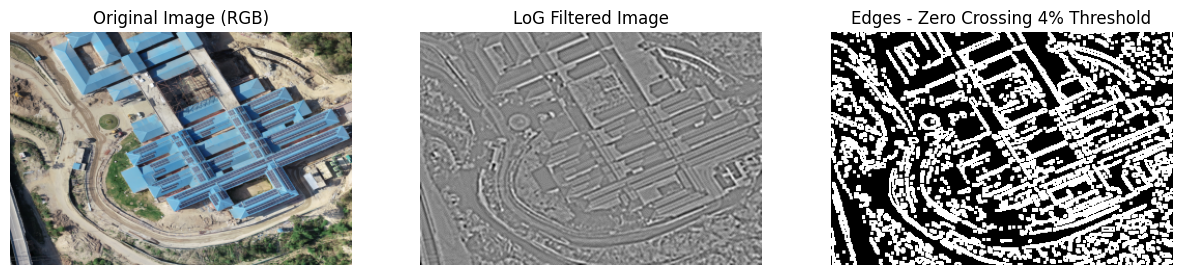

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#Load and apply Gaussian blur
image = cv2.imread(r"/content/Top view(1).png", cv2.IMREAD_COLOR)
image_blurred = cv2.GaussianBlur(image, (5, 5), 0) # 5 x 5 as given in book

# Convert the blurred image to grayscale
image_gray = cv2.cvtColor(image_blurred, cv2.COLOR_BGR2GRAY)

#Apply LoG filter
LoG = cv2.Laplacian(image_gray, cv2.CV_16S)

#Zero cross
threshold_value = 255 * 0.04 # 255 is the max value
minLoG = cv2.morphologyEx(LoG, cv2.MORPH_ERODE, np.ones((3,3)))
maxLoG = cv2.morphologyEx(LoG, cv2.MORPH_DILATE, np.ones((3,3)))
zeroCross = np.logical_or(np.logical_and(minLoG < threshold_value,  LoG > threshold_value), np.logical_and(maxLoG > threshold_value, LoG < threshold_value))

#Plotting
plt.figure(figsize=(15, 6))

plt.subplot(131)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image (RGB)')
plt.axis('off')

#LoG filtered image
plt.subplot(132)
plt.imshow(LoG, cmap='gray')
plt.title('LoG Filtered Image')
plt.axis('off')

#edge image from zero-crossing
plt.subplot(133)
plt.imshow(zeroCross, cmap='gray')
plt.title('Edges - Zero Crossing 4% Threshold')
plt.axis('off')

plt.show()


### Q2. Perform Hough-Transform for circle detection on the image X. You can use build in functions.

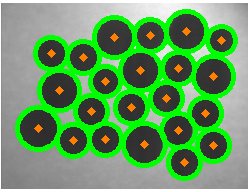

In [3]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the uploaded image and convert to grayscale
image = cv2.imread('/content/coins.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#Apply Gaussian Blur
blurred = cv2.GaussianBlur(gray, (3, 3), 2)

#Perform Hough Circle Transform
circles = cv2.HoughCircles(
    blurred,
    cv2.HOUGH_GRADIENT,
    dp=1.1,
    minDist=5,
    param1=100,
    param2=30,
    minRadius=3,
    maxRadius=43
)

#Draw detected circles
if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    for (x, y, r) in circles:
        #Draw the circle in the output image
        cv2.circle(image, (x, y), r, (0, 255, 0), 4)
        #Draw a small circle at the center
        cv2.circle(image, (x, y), 2, (0, 128, 255), 3)

#Show the output image
cv2_imshow(image)
